<a href="https://colab.research.google.com/github/rfps09/Colab-Backup/blob/main/PerceptronMulticamadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

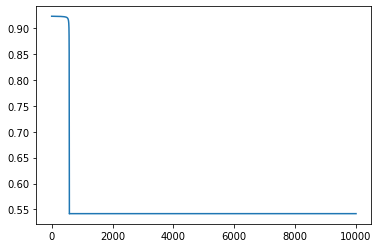

[-1.04472812  0.95527188 -1.04472812  0.95527188  0.95527188  0.95527188
 -1.04472812  0.95527188 -1.04472812  0.95527188 -1.04472812  0.95527188
 -1.04472812]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
   
numEpocas = 10000        # Número de épocas.
q = 13                # Número de padrões.

eta = 0.01            # Taxa de aprendizado.
m = 2                 # Número de neurônios na camada de entrada.
N = 8                # Número de neurônios na camada escondida.
L = 1                 # Número de neurônios na camada de saída.

# Carrega os dados de treinamento
peso = np.array([113, 122, 107,  98, 115, 120, 104, 108, 117, 101, 112, 106, 116])
pH   = np.array([6.8, 4.7, 5.2, 3.6, 2.9, 4.2, 6.3, 4.0, 6.3, 4.2, 5.6, 3.1, 5.0])

# Vetor de classificação desejada.
d = np.array([-1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1])

# Inicia aleatoriamente as matrizes de pesos.
W1 = np.random.random((N, m + 1))
W2 = np.random.random((L, N + 1))

# Array para amazernar os erros.
E = np.zeros(q)
Etm = np.zeros(numEpocas)

# bias
bias = 1

# Entrada do Perceptron.
X = np.vstack((peso, pH))   # Ou X = np.asarray([peso, pH])

# ===============================================================
# TREINAMENTO.
# ===============================================================
        
for i in range(numEpocas):
    for j in range(q):
        
        # Insere o bias no vetor de entrada.
        Xb = np.hstack((bias, X[:,j]))

        # Saída da Camada Escondida.
        O1 = np.tanh(W1.dot(Xb))            # Equações (1) e (2) juntas.      

        # Incluindo o bias. Saída da camada escondida é a entrada da camada
        # de saída.
        O1b = np.insert(O1, 0, bias)

        # Neural network output
        Y = np.tanh(W2.dot(O1b))            # Equações (3) e (4) juntas.
        
        e = d[j] - Y                        # Equação (5).

        # Erro Total.
        E[j] = (e.transpose().dot(e))/2     # Equação de erro quadrática.
        
        # Imprime o número da época e o Erro Total.
        # print('i = ' + str(i) + '   E = ' + str(E))
   
        # Error backpropagation.   
        # Cálculo do gradiente na camada de saída.
        delta2 = np.diag(e).dot((1 - Y*Y))          # Eq. (6)
        vdelta2 = (W2.transpose()).dot(delta2)      # Eq. (7)
        delta1 = np.diag(1 - O1b*O1b).dot(vdelta2)  # Eq. (8)

        # Atualização dos pesos.
        W1 = W1 + eta*(np.outer(delta1[1:], Xb))
        W2 = W2 + eta*(np.outer(delta2, O1b))
    
    Etm[i] = E.mean()
   
# print("Erro Total Médio = " + str(Etm))
plt.plot(Etm)
plt.show()

# ===============================================================
# TESTE DA REDE.
# ===============================================================

Error_Test = np.zeros(q)

for i in range(q):
    # Insere o bias no vetor de entrada.
    Xb = np.hstack((bias, X[:,i]))

    # Saída da Camada Escondida.
    O1 = np.tanh(W1.dot(Xb))            # Equações (1) e (2) juntas.      

    # Incluindo o bias. Saída da camada escondida é a entrada da camada
    # de saída.
    O1b = np.insert(O1, 0, bias)

    # Neural network output
    Y = np.tanh(W2.dot(O1b))            # Equações (3) e (4) juntas.

    Error_Test[i] = d[i] - Y
    
print(Error_Test)
print(np.round(Error_Test) - d)

In [ ]:
peso = np.array([110, 113, 120,  125, 97])
pH   = np.array([6.0, 4.4, 3.5, 5.5, 5.0])

# Vetor de classificação desejada.
d = np.array([-1, -1, 1, 1, 1])

# ===============================================================
# TESTE DA REDE.
# ===============================================================

Error_Test = np.zeros(5)

for i in range(5):
    # Insere o bias no vetor de entrada.
    Xb = np.hstack((bias, X[:,i]))

    # Saída da Camada Escondida.
    O1 = np.tanh(W1.dot(Xb))            # Equações (1) e (2) juntas.      

    # Incluindo o bias. Saída da camada escondida é a entrada da camada
    # de saída.
    O1b = np.insert(O1, 0, bias)

    # Neural network output
    Y = np.tanh(W2.dot(O1b))            # Equações (3) e (4) juntas.

    Error_Test[i] = d[i] - Y
    
print(numEpocas)
print(Error_Test)
print(np.round(Error_Test) - d)

10000
[-1.04472812 -1.04472812  0.95527188  0.95527188  0.95527188]
[0. 0. 0. 0. 0.]
